reading the dataset

In [30]:
import pandas as pd
from pathlib import Path

### Exploration

In [31]:
sales = pd.read_csv('../data/Train.csv', header=0)

Column descriptions:

- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the
particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome
variable to be predicted.

In [32]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [33]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


So we have 1463 item weights missing, and 2410 outlet_size records missing. looks like Outlet_size repeats itself according to Outlet_identifier, so i'll need to check if we have outlet_size mentioned for the outlet identifiers and will just replace NaN's with it. As for the item_weight, i'll need to check if it's related to item identifier and check if there are records with that weight not missing. if smth goes wrong i'll just replace the NaN's with median value. 

In [34]:
sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Fat_Content column holds categorical values that should be unified into two categories: Low Fat & Regular; this could be converted to numbers using ordinary encoder. 

In [35]:
sales['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

we have 16 Item_Type categories - this one needs to be encoded using one-hot encoder

In [36]:
sales['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

Can identifier be a category? i would doubt, we might need to remove this column

In [37]:
sales[sales['Outlet_Size'].isna()]['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT045    929
OUT017    926
OUT010    555
Name: count, dtype: int64

it looks like the outlets above have no outlet sizes across all of their records. i will fill in the NaN values with most frequent value in Outlet_Size. 

In [38]:
sales['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_size will be converted using ordinary encoder

In [39]:
sales['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

there seems to be no explanation about the outlet location tiers except the following:

*Outlet_Location_Type: The type of city in which the store is located*

Because of that we can't determine if Tier 1 is better or worse than Tier 3, hence we'll need one-hot encoder

In [40]:
sales['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

outlet type will also be encoded using 1-hot encoding 

--------------------------------------------------------------------
i need to plot my values to see if there's any correlation

In [41]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [42]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [43]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

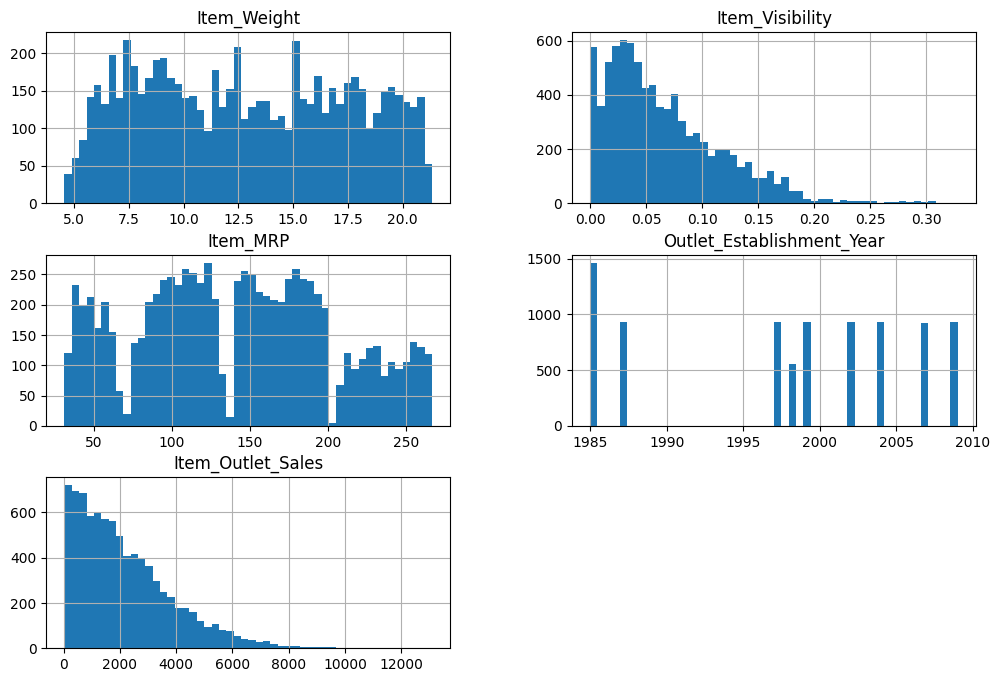

In [44]:
sales.hist(bins = 50, figsize=(12, 8))
plt.show()

These features are distributed a bit weirdly. We'll need to transform these values to make them more bell-shaped (normal distribution)

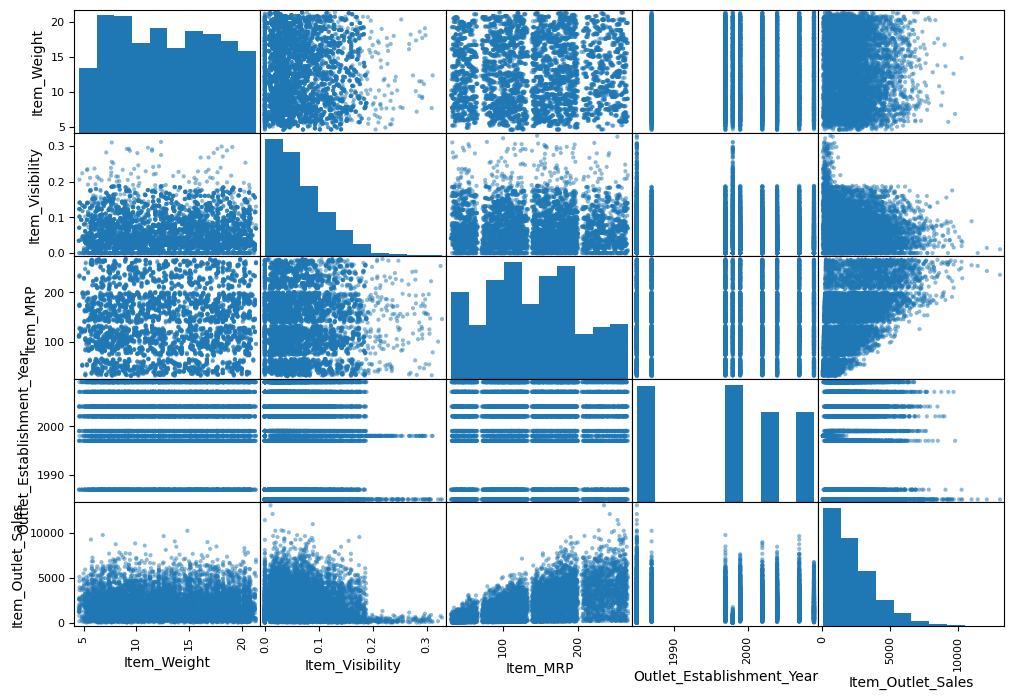

In [45]:

attributes = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

scatter_matrix(sales[attributes], figsize=(12, 8))
plt.show()

In [46]:
corr_matrix = sales[attributes].corr()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

*Item_MRP: Maximum Retail Price (list price) of the product*

has the highest correlation 0.567, the rest has very weak correlation. 

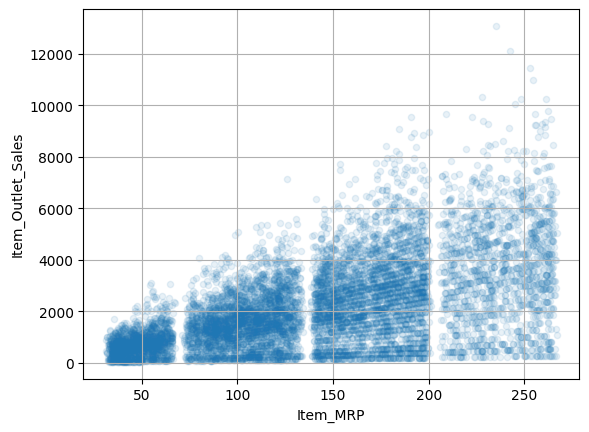

In [47]:
sales.plot(kind='scatter', x='Item_MRP', y = 'Item_Outlet_Sales', alpha=0.1, grid=True)
plt.show()

there seems to be a twisted trend going on: the higher MRP the more the item will sale in stores

### Data preparation

In [48]:
sales_x = sales.drop("Item_Outlet_Sales", axis=1)
sales_labels = sales['Item_Outlet_Sales'].copy()

In [63]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer_median = SimpleImputer(strategy = "median")
imputer_freq = SimpleImputer(strategy = "most_frequent")

In [50]:
sales_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


In [51]:
# replacing Null values - with median for Item_Weight and with most frequent for Outlet_size

sales_num = sales_x.select_dtypes(include=[np.number])
imputer_median.fit(sales_num)

SimpleImputer(strategy='median')

In [52]:
X = imputer_median.transform(sales_num)

In [53]:
sales_tr = pd.DataFrame(X, columns=sales_num.columns, index=sales_num.index)
sales_tr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.300,0.016047,249.8092,1999.0
1,5.920,0.019278,48.2692,2009.0
2,17.500,0.016760,141.6180,1999.0
3,19.200,0.000000,182.0950,1998.0
4,8.930,0.000000,53.8614,1987.0
...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0
8519,8.380,0.046982,108.1570,2002.0
8520,10.600,0.035186,85.1224,2004.0
8521,7.210,0.145221,103.1332,2009.0


In [54]:
sales_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   float64
dtypes: float64(4)
memory usage: 266.5 KB


working with categorical values

In [62]:
sales_cat = sales_x.loc[:, ~sales_x.columns.isin(sales_num.columns)]

In [66]:
sales_cat.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [67]:
imputer_freq.fit(sales_cat)

SimpleImputer(strategy='most_frequent')

imputer to replace missing values with most frequent ones

In [68]:
cat_x = imputer_freq.transform(sales_cat)

In [69]:
sales_cat_tr = pd.DataFrame(cat_x, columns=sales_cat.columns, index=sales_cat.index)
sales_cat_tr

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [72]:
sales_cat_tr.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [71]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder()

In [75]:
sales_cat_tr['Item_Fat_Content'].replace({"LF": 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace=True)

In [77]:
# apply ordinal and onehot encoders